<a href="https://colab.research.google.com/github/rikkudo/landingpage-dojo1/blob/main/SAML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Software for Advanced Machine Learning course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course). Remember that you will have to defend the assignment at the end of the semester.
- **Deadline is October 21**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name:**  
**Neptun ID:** 

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem. 

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to use Tensorboard for visualizing the accuracy, loss and details about the model and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
# ADD YOUR CODE HERE
from keras.models import Sequential
import tensorflow as tf

import tensorflow_datasets as tfds

from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
import theano

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
import os
import os.path
import pandas as pd

from typing import Any, Callable, List, Optional, Union, Tuple

from PIL import Image

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import download_url, check_integrity

In [ ]:
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
from torchvision import datasets, models, transforms

In [ ]:
pip install pretrainedmodels

     |████████████████████████████████| 58 kB 3.4 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=0ce69946711108ac28df93f6299d5b35e5793e739876a1ccb1b08f9f84577314
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading the dataset
Show some images and labels of your dataset

In [ ]:
# ADD YOUR CODE HERE

!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xvzf ./101_ObjectCategories.tar.gz 

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chai

#### Splitting the dataset

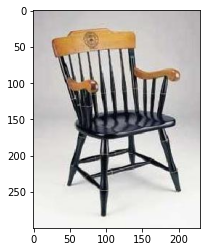

8677


In [ ]:
image_paths = list(paths.list_images('/content/101_ObjectCategories'))
x = []
y = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x.append(image)
    y.append(label)
   
x = np.array(x, dtype="object")
y = np.array(y)

plt.imshow(image)
plt.show()
#print(len(y))


In [ ]:
# one hot encode
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(f"Total number of classes: {len(lb.classes_)}")

Total number of classes: 101


In [ ]:
# ADD YOUR CODE HERE

import numpy as np
import math
from typing import List
import os
import argparse
import glob
import shutil

def list_files(path):
    files = os.listdir(path)
    return np.asarray(files)

def split_files(oldpath, newpath, classes):
    for name in classes:
        full_dir = os.path.join(os.getcwd(), f"{oldpath}/{name}")

        files = list_files(full_dir)
        total_file = np.size(files,0)
        # split data set into 3: train, validation and test

        train_size = math.ceil(total_file * 3/4) # 75% for training 

        validation_size = train_size + math.ceil(total_file * 1/8) # 12.5% for validation
        test_size = validation_size + math.ceil(total_file * 1/8) # 12.5x% for testing 

        train = files[0:train_size]
        validation = files[train_size:validation_size]
        test = files[validation_size:]

        move_files(train, full_dir, f"train/{name}")
        move_files(validation, full_dir, f"validation/{name}")
        move_files(test, full_dir, f"test/{name}")

def move_files(files, old_dir, new_dir):
    new_dir = os.path.join(os.getcwd(), new_dir);
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)

    for file in np.nditer(files):
        old_file_path = os.path.join(os.getcwd(), f"{old_dir}/{file}")
        new_file_path = os.path.join(os.getcwd(), f"{new_dir}/{file}")

        shutil.move(old_file_path, new_file_path)

In [ ]:
classes = ['Leopards', 'airplanes', 'butterfly', 'camera', 'elephant', 'lamp', 'watch', 'umbrella', 'rhino'];

split_files('101_ObjectCategories', './', classes)

#### Pre-processing the dataset

In [ ]:
# ADD YOUR CODE HERE

from torchvision import transforms

image_transforms = {
    'train': transforms.Compose([
              transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
              transforms.RandomRotation(degrees=15),
              transforms.RandomHorizontalFlip(),
              transforms.CenterCrop(size=224),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
             transforms.Resize(size=256),
             transforms.CenterCrop(size=224),
             transforms.ToTensor(),
             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])              
    ]),
    'test': transforms.Compose([
             transforms.Resize(size=256),
             transforms.CenterCrop(size=224),
             transforms.ToTensor(),
             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])              
    ])
}

## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results with Tensorboard.

#### Load the architecture

In [ ]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [ ]:
# ADD YOUR CODE HERE

import torchvision.models as models
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
import os
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm
import os
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
batch_size = 64
img_size =224

root_dir = '/content/101_ObjectCategories'

img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(root_dir,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

num_images = len(datagen.filenames)
#epochs = int(math.ceil(num_images / batch_size))

print(num_images)
#print(epochs)
#feature_list = model.predict_generator(datagen, num_epochs,verbose = 1)

Found 7458 images belonging to 102 classes.
7458


In [ ]:
for param in model.parameters():
  param.requires_grad = False

#fc_inputs = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(img_size, 2048),
    nn.ReLU(inplace=True),
    nn.Linear(2048, 10),
    nn.Dropout(0.4),
    nn.LogSoftmax(dim=1)
)

In [ ]:
import torchvision.datasets as datasets
import torch.utils.data as loader

data = {
    'train': datasets.ImageFolder(root='./train', transform=image_transforms['train']),
    'validation': datasets.ImageFolder(root='./validation', transform=image_transforms['validation']),
    'test': datasets.ImageFolder(root='./test', transform=image_transforms['test'])
}

# create a data loader instance with each dataset with a batch size of 10 and shuffling
batch_size = 10
train_data = loader.DataLoader(data['train'], batch_size=batch_size, shuffle=True)
validation_data = loader.DataLoader(data['validation'], batch_size=batch_size, shuffle=True)
test_data = loader.DataLoader(data['test'], batch_size=batch_size, shuffle=True)


In [ ]:
train_data_size = len(data['train'])
validation_data_size = len(data['validation'])
test_data_size =  len(data['test'])

#### Define your optimizer and loss function

In [ ]:
# ADD YOUR CODE HERE

import torch.optim as optim
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

#### Train your network

In [ ]:
# ADD YOUR CODE HERE

import time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
  device = torch.tensor(1, dtype=torch.float, requires_grad=True).cuda()
  start = time.time()
  history = []
  best_acc = 0.0
  for epoch in range(epochs):
    epoch_start = time.time()
    print(f'Epoch : {epoch+1}/{epochs}')
    model.train()
    train_loss = 0.0 
    train_acc = 0.0

    valid_loss = 0.0
    valid_acc  = 0.0

    for i, (inputs, labels) in enumerate(train_data):
      inputs = inputs.to(device)
      labels = labels.to(device)
      # Clean existing gradients
      #optimizer.zero_grad()
      # Forward pass - compute outputs on input data using the model
      outputs = model(inputs)
      # Compute loss
      loss = loss_criterion(outputs, labels)
      # Backpropagate the gradients
      #loss = Variable(loss1, requires_grad = True)
      loss.backward()
      # Update the parameters
      optimizer.step()
      # Compute the total loss for the batch and it to train_loss
      train_loss += loss.item() * inputs.size(0)
      # Compute the accuracy
      ret, predictions = torch.max(outputs.data,1)
      correct_counts = predictions.eq(labels.data.view_as(predictions))

      # Convert correct_counts to float and then compute the mean
      acc = torch.mean(correct_counts.type(torch.FloatTensor))
      # Compute total accuracy in the whole batch and add to train_acc
      train_acc += acc.item() * inputs.size(0)
      print(f'Batch number: {i}, Training: Loss: {loss.item()}, Accuracy: {acc.item()}')

    with torch.no_grad():
      model.eval()
      for j, (inputs, labels) in enumerate(validation_data): 
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Forward pass - compute outputs on input data using the model
        outputs = model(inputs)

        # Compute loss
        loss = loss_criterion(outputs, labels)
        # Compute the total loss for  the batch and add it to valid_loss
        valid_loss += loss.item() * inputs.size(0)
        # Calculate validation accuracy

        ret, predictions = torch.max(outputs.data, 1)
        correct_prediction_counts = predictions.eq(labels.data.view_as(predictions))

        # Convert correct_prediction_counts to float and then compute the mean
        acc = torch.mean(correct_prediction_counts.type(torch.FloatTensor))

        # Compute total accuracy in the whole batch and add to valid_acc

        valid_acc +=acc.item() * inputs.size(0)

      avg_train_loss = train_loss/train_data_size
      avg_train_acc = train_acc/train_data_size

      avg_valid_loss = valid_loss/validation_data_size
      avg_valid_acc = valid_acc/validation_data_size

      history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

      epoch_end = time.time()

      print(f'Epoch : {epoch}, Training: Loss: f{avg_train_loss}, Accuracy: {avg_train_acc*100}%, \n\t\tValidation : Loss : {avg_valid_loss}, Accuracy: {avg_valid_acc*100}%, Time: {epoch_end-epoch_start}s')

      # Save if the model has best accuracy till now

      torch.save(model.state_dict(), f'model_{epoch}.pth')

    return model, history

#### Show results (accuracy and loss) on training and validation sets

In [ ]:
# ADD YOUR CODE HERE

num_epochs = 5
trained_model, history = train_and_validate(model, loss_func, optimizer, num_epochs)

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [ ]:
# ADD YOUR CODE HERE
def computeModelAccuracy(model, loss_criterion):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  test_acc = 0.0
  test_loss = 0.0

  with torch.no_grad():
    # Set to evaluation mode
    model.eval()
    for i, (inputs, labels) in enumerate(test_data):
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)

      # Compute loss
      loss = loss_criterion(outputs, labels)

      # Compute the toal loss item 
      test_loss += loss.item() * inputs.size(0)

      ret, predictions = torch.max(outputs.data, 1)
      correct_counts = predictions.eq(labels.data.view_as(predictions))
      acc = torch.mean(correct_counts.type(torch.FloatTensor))
      test_acc +=acc.item() * inputs.size(0)

      print(f'Test Batch number: {i}, Test: Loss: {loss.item()}, Accuracy: {acc.item()}')

      # Find average test loss and test accuracy
      avg_test_loss = test_loss/test_data_size
      avg_test_acc = test_acc/test_data_size

      print(f'Test accuracy: {avg_test_acc}')

#### Show some predictions

In [ ]:
# ADD YOUR CODE HERE

from PIL import Image
import requests
import matplotlib.pyplot as plt

index_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print (index_to_class)

def makePrediction(model, url):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = image_transforms['test']

    test_image = Image.open(requests.get(url, stream=True).raw)

    plt.imshow(test_image)

    test_image_tensor = transform(test_image)
    test_image_tensor = test_image_tensor.view(1, 3, 224, 224).to(device)
    with torch.no_grad():
        model.eval()
        out = model(test_image_tensor)
        ps = torch.exp(out)

        topk, topclass = ps.topk(3, dim=1)
        for i in range(3):
            print(f"Prediction {i+1} : {index_to_class[topclass.cpu().numpy()[0][i]]}, Score: {topk.cpu().numpy()[0][i] * 100}%")

In [ ]:
model = torch.load('_model_0.pt')
makePrediction(model, 'https://cdn.britannica.com/30/136130-050-3370E37A/Leopard.jpg')

#### Answer the questions

In [ ]:
# ADD YOUR ANSWERS HERE

The result is actually not really good and I think the network overfitted ed? 

and I think that is because of the thousand of paramters it encloses. 
A model with these many parameters can overfit on the training data because it has sufficient capacity 
to do so